# Prediction Using Supervised ML

### Author : Apoorva Srinivas
#### Data Science & Business Analytics internship in its Graduate Rotational Internship Program (GRIP) by The Sparks Foundation
#### June 2021

#### Summary
- Problem Statement: Predict the precentage of a student based on the number of study hours
- Algorithm Used: Simple Linear Regression
- Packages Used: Sklearn, statsmodel, numPy, Pandas, matplotlib, seaborn


### Step 1: Importing and Understanding Data

In [1]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Import the csv file
score = pd.read_csv("student_scores - student_scores.csv")
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
score.shape

(25, 2)

In [5]:
#No null values found
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Visualizing the Data

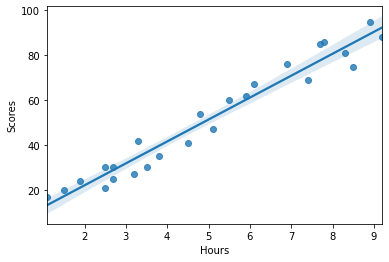

In [7]:
#Checking if the variables are linearly correlated
sns.regplot(data=score, x="Hours", y="Scores")
plt.show()

### Step 3: Performing Simple Linear Regression

In [8]:
#Assign the feature variable and target variable
X = score['Hours']
y = score['Scores']

#### Train - Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Using statsmodel.api

In [10]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS' (Ordinary Least Squares)
lr = sm.OLS(y_train, X_train_sm).fit()

In [11]:
# the intercept and the slope of the regression line fitted
lr.params

const    1.989423
Hours    9.835444
dtype: float64

In [12]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.59e-13
Time:                        19:10:24   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.530      -4.536       8.515
Hours          9.8354      0.521     18.886      0.000       8.741      10.930
==============================================================================
Omnibus:                        7.040   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.943
Skew:                          -0.248   Prob(JB):                        0.379
Kurtosis:                       1.556   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- The coefficient for Hours is 9.8354, with a very low p value. The coefficient is statistically significant. So the association is not purely by chance. 
- R-squared is 0.952, which means, 95.2% of the variance in Scores is explained by Hours.
- F statistic has a very low p value which means that the model fit is statistically significant, and the explained variance isn't purely by chance.

#### Using sklearn LinearRegression

In [13]:
#Reshape the feature since it has only one feature
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [14]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
print(lm.intercept_)
print(lm.coef_)

1.9894231109746912
[9.83544438]


Let's visualize how well the model fit the data.

From the parameters that we got, our linear regression equation becomes:

Scores = 1.9894 +9.8354 × Hours

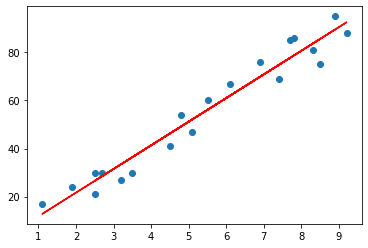

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.9894 +9.8354*X_train, 'r')
plt.show()

### Step 4: Residual Analysis

To validate assumptions of the model, and hence the reliability for inference

In [17]:
#Distribution of Error Terms
y_train_pred = lm.predict(X_train)
res = (y_train - y_train_pred)

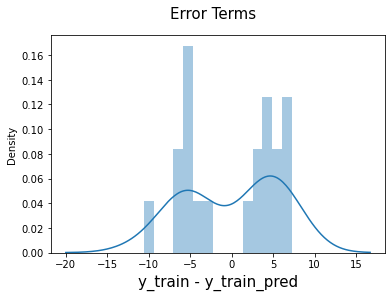

In [18]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the uniformly distributed with a mean 0. All good!

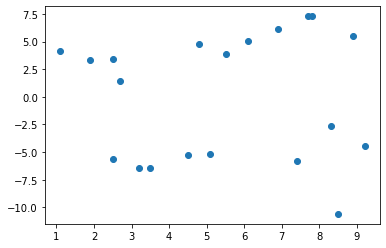

In [19]:
# Looking for patterns in residuals

plt.scatter(X_train,res)
plt.show()

### Step 5: Predictions on the Test Set

In [20]:
# Predict the y values corresponding to X_test
y_pred = lm.predict(X_test)

In [21]:
#Looking at the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

4.543287018366107

In [22]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.9050356232459791

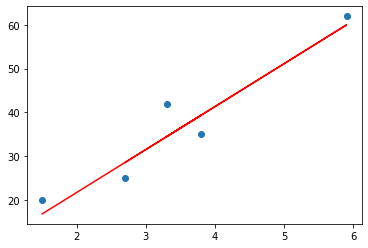

In [23]:
# Visualizing the fit on test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [24]:
# Comparing True values to Predicted values

df= pd.DataFrame(y_test)
df['Predicted_Scores']= y_pred
df

,Scores,Predicted_Scores
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


### Step 6: Predict Score for new input value (Hours)

In [25]:
# Predicting for a student who studies 9.25 hrs/day
hours = [[9.25]]

In [26]:
score_pred = lm.predict(hours)
print(score_pred)

[92.96728365]


### If a student studies for 9.25 hrs/day, the predicted score is 92.96%